<a href="https://colab.research.google.com/github/brnnwon/Fraud-detection/blob/main/Auto_Insurance_Fraud_Detection_SMOTE_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import dataset

In [ ]:
url = 'https://raw.githubusercontent.com/brnnwon/Fraud-detection/main/fraud_oracle.csv'

df = pd.read_csv(url)

In [ ]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [ ]:
df.shape

(15420, 33)

In [ ]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [ ]:
df['FraudFound_P'].value_counts()

0    14497
1      923
Name: FraudFound_P, dtype: int64

#Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from collections import Counter

from imblearn.over_sampling import ADASYN, SMOTE

In [ ]:
df.drop(columns = 'PolicyNumber', inplace = True)

In [ ]:
for column in df:
  print(column)
  print(sorted(df[column].unique()), '\n')

Month
['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'] 

WeekOfMonth
[1, 2, 3, 4, 5] 

DayOfWeek
['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'] 

Make
['Accura', 'BMW', 'Chevrolet', 'Dodge', 'Ferrari', 'Ford', 'Honda', 'Jaguar', 'Lexus', 'Mazda', 'Mecedes', 'Mercury', 'Nisson', 'Pontiac', 'Porche', 'Saab', 'Saturn', 'Toyota', 'VW'] 

AccidentArea
['Rural', 'Urban'] 

DayOfWeekClaimed
['0', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'] 

MonthClaimed
['0', 'Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'] 

WeekOfMonthClaimed
[1, 2, 3, 4, 5] 

Sex
['Female', 'Male'] 

MaritalStatus
['Divorced', 'Married', 'Single', 'Widow'] 

Age
[0, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 7

<Axes: >

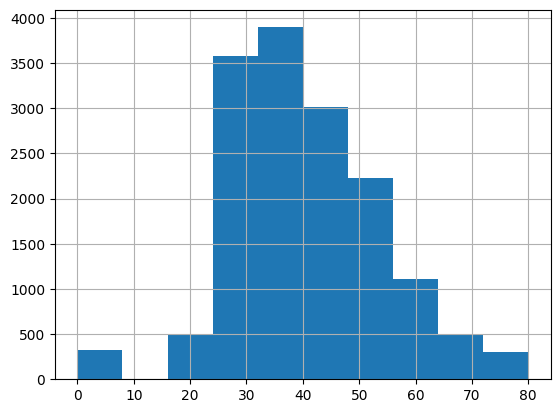

In [ ]:
df['Age'].hist()

In [ ]:
mean_age = df[df['Age'] > 0]['Age'].mean()

print(mean_age)

40.700331125827816


In [ ]:
# Replace age values equal to 0 with the calculated mean
df['Age'] = df['Age'].apply(lambda x: mean_age if x == 0 else x)

<Axes: >

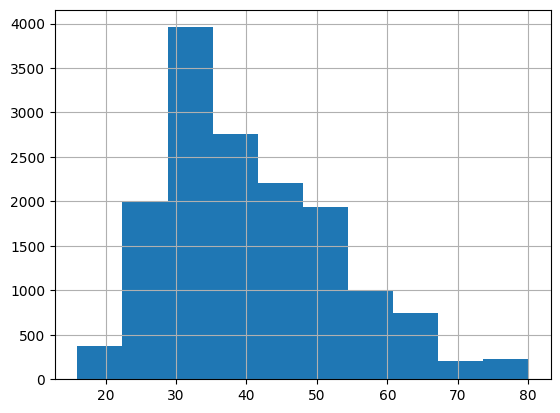

In [ ]:
df['Age'].hist()

In [ ]:
df['AccidentArea'] = df['AccidentArea'].replace({'Urban':1, 'Rural':0})
df['Sex'] = df['Sex'].replace({'Female':1, 'Male':0})
df['Fault'] = df['Fault'].replace({'Policy Holder':1, 'Third Party':0})
df['PoliceReportFiled'] = df['PoliceReportFiled'].replace({'Yes':1, 'No':0})
df['WitnessPresent'] = df['WitnessPresent'].replace({'Yes':1, 'No':0})
df['AgentType'] = df['AgentType'].replace({'External':1, 'Internal':0})
df['Month'] = df['Month'].replace({'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12})
df['DayOfWeek'] = df['DayOfWeek'].replace({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7})
df['MonthClaimed'] = df['MonthClaimed'].replace({'0':0,'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12})
df['DayOfWeekClaimed'] = df['DayOfWeekClaimed'].replace({'0':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7})
df['PastNumberOfClaims'] = df['PastNumberOfClaims'].replace({'none':0 ,'1':1,'2 to 4':2,'more than 4':3})
df['NumberOfSuppliments'] = df['NumberOfSuppliments'].replace({'none':0,'1 to 2':1,'3 to 5':2,'more than 5':4})
df['VehiclePrice'] = df['VehiclePrice'].replace({'less than 20000':0,'20000 to 29000':1,'30000 to 39000':2,
                                                 '40000 to 59000':3,'60000 to 69000':4,'more than 69000':5})
df['AgeOfVehicle'] = df['AgeOfVehicle'].replace({'3 years':3,'6 years':6,'7 years':7,'more than 7':8,'5 years':5,'new':0,'4 years':4,'2 years':2})
df['Days_Policy_Accident'] = df['Days_Policy_Accident'].replace({'none':0, '1 to 7':1, '8 to 15':2, '15 to 30':3, 'more than 30':4})
df['Days_Policy_Claim'] = df['Days_Policy_Claim'].replace({'none':0, '8 to 15':1, '15 to 30':2, 'more than 30':3})
df['AgeOfPolicyHolder'] = df['AgeOfPolicyHolder'].replace({'16 to 17':0, '18 to 20':1, '21 to 25':2, '26 to 30':3, '31 to 35':4, '36 to 40':5, '41 to 50':6, '51 to 65':7, 'over 65':8})
df['AddressChange_Claim'] = df['AddressChange_Claim'].replace({'no change':0, 'under 6 months':1, '1 year':2, '2 to 3 years':3, '4 to 8 years':4})
df['NumberOfCars'] = df['NumberOfCars'].replace({'1 vehicle':0, '2 vehicles':1, '3 to 4':2, '5 to 8':3, 'more than 8':4})

In [ ]:
# Calculate the median of non-zero day-of-week values
median_day_of_week = df[df['DayOfWeekClaimed'] != 0]['DayOfWeekClaimed'].mode()
print(median_day_of_week)

0    1
Name: DayOfWeekClaimed, dtype: int64


In [ ]:
# Replace '0' values with the calculated median
df['DayOfWeekClaimed'] = df['DayOfWeekClaimed'].apply(lambda x: median_day_of_week if x == 0 else x)

In [ ]:
df['DayOfWeekClaimed'] = df['DayOfWeekClaimed'].astype('int')
df['MonthClaimed'] = df['MonthClaimed'].astype('int')

In [ ]:
mode_month_claimed = df[df['MonthClaimed'] != 0]['MonthClaimed'].mode()
print(mode_month_claimed)

0    1
Name: MonthClaimed, dtype: int64


In [ ]:
# Replace '0' values with the calculated median
df['MonthClaimed'] = df['MonthClaimed'].apply(lambda x: mode_month_claimed if x == 0 else x)

In [ ]:
ohe_cols = ['Make', 'MaritalStatus', 'PolicyType', 'VehicleCategory', 'BasePolicy']

In [ ]:
df = pd.get_dummies(df, columns=ohe_cols)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 65 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Month                            15420 non-null  int64  
 1   WeekOfMonth                      15420 non-null  int64  
 2   DayOfWeek                        15420 non-null  int64  
 3   AccidentArea                     15420 non-null  int64  
 4   DayOfWeekClaimed                 15420 non-null  int64  
 5   MonthClaimed                     15420 non-null  int64  
 6   WeekOfMonthClaimed               15420 non-null  int64  
 7   Sex                              15420 non-null  int64  
 8   Age                              15420 non-null  float64
 9   Fault                            15420 non-null  int64  
 10  VehiclePrice                     15420 non-null  int64  
 11  FraudFound_P                     15420 non-null  int64  
 12  RepNumber         

In [ ]:
X = df.drop('FraudFound_P', axis = 1)
y = df['FraudFound_P']

In [ ]:
print(X.shape, y.shape)

(15420, 64) (15420,)


In [ ]:
counter = Counter(y)
print(counter)

Counter({0: 14497, 1: 923})


In [ ]:
# transform the dataset
X, y = SMOTE().fit_resample(X, y)
X_train_re, X_test_re, y_train_re, y_test_re = train_test_split(X, y, test_size=0.2)

In [ ]:
print(X_train_re.shape, y_train_re.shape)

(23195, 64) (23195,)


In [ ]:
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 14497, 1: 14497})


In [ ]:
scaler = StandardScaler()
X_train_re = scaler.fit_transform(X_train_re)
X_test_re = scaler.fit_transform(X_test_re)

In [ ]:
X_train_re

array([[-1.1970558 , -0.47244919,  1.7347941 , ..., -0.64107246,
        -0.7035658 ,  2.18368165],
       [ 1.18045067, -1.30276128,  0.15749218, ..., -0.64107246,
         1.42133117, -0.45794221],
       [-0.30549088, -0.47244919, -1.41980973, ..., -0.64107246,
        -0.7035658 , -0.45794221],
       ...,
       [-0.00830257, -1.30276128,  1.20902679, ...,  1.55988606,
        -0.7035658 , -0.45794221],
       [-0.60267919, -0.47244919, -0.89404242, ..., -0.64107246,
         1.42133117, -0.45794221],
       [-0.30549088,  2.01848707, -0.36827512, ..., -0.64107246,
         1.42133117, -0.45794221]])

In [ ]:
#Change the shape so that our model can process the data
X_train_re=X_train_re.reshape(X_train_re.shape[0],X_train_re.shape[1],1)
X_test_re=X_test_re.reshape(X_test_re.shape[0],X_test_re.shape[1],1)

# check the shape again
X_train_re.shape, X_test_re.shape

((23195, 64, 1), (5799, 64, 1))

#Create The CNN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv1D,BatchNormalization,Dropout, MaxPool1D
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()

#1st layer
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=X_train_re[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(rate=0.2))
#2nd layer
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(rate=0.2))
# build DNN
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 63, 32)            96        
                                                                 
 batch_normalization (Batch  (None, 63, 32)            128       
 Normalization)                                                  
                                                                 
 max_pooling1d (MaxPooling1  (None, 31, 32)            0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 31, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 30, 64)            4160      
                                                                 
 batch_normalization_1 (Bat  (None, 30, 64)            2

In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_re, y_train_re, epochs=50, validation_data=(X_test_re,y_test_re))

Epoch 1/50
725/725 [==============================] - 10s 7ms/step - loss: 0.4566 - accuracy: 0.8160 - val_loss: 0.2187 - val_accuracy: 0.9227
Epoch 2/50
725/725 [==============================] - 5s 7ms/step - loss: 0.2806 - accuracy: 0.8904 - val_loss: 0.1924 - val_accuracy: 0.9321
Epoch 3/50
725/725 [==============================] - 4s 6ms/step - loss: 0.2376 - accuracy: 0.9067 - val_loss: 0.1774 - val_accuracy: 0.9365
Epoch 4/50
725/725 [==============================] - 5s 7ms/step - loss: 0.2143 - accuracy: 0.9164 - val_loss: 0.1723 - val_accuracy: 0.9360
Epoch 5/50
725/725 [==============================] - 5s 6ms/step - loss: 0.2080 - accuracy: 0.9176 - val_loss: 0.1642 - val_accuracy: 0.9390
Epoch 6/50
725/725 [==============================] - 5s 6ms/step - loss: 0.1945 - accuracy: 0.9232 - val_loss: 0.1574 - val_accuracy: 0.9414
Epoch 7/50
725/725 [==============================] - 5s 7ms/step - loss: 0.1878 - accuracy: 0.9277 - val_loss: 0.1565 - val_accuracy: 0.9403
Epoch

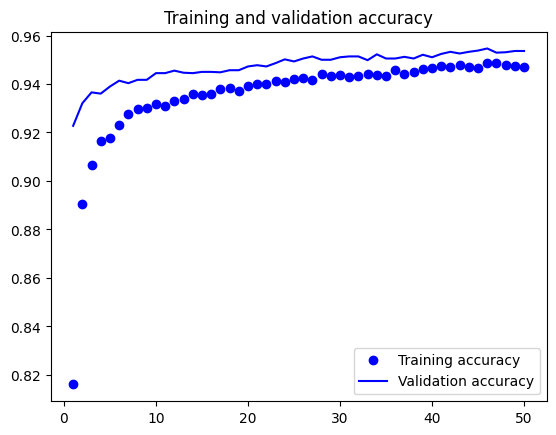

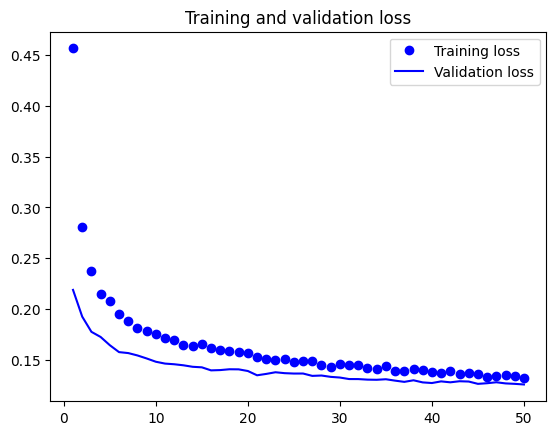

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
score=model.evaluate(X_test_re,y_test_re)
print(score)

182/182 [==============================] - 0s 2ms/step - loss: 0.1255 - accuracy: 0.9536
[0.12550733983516693, 0.9536126852035522]


In [ ]:
y_pred = model.predict(X_test_re)

182/182 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score, classification_report

In [ ]:
y_expected=pd.DataFrame(y_test_re)

In [ ]:
cnf_matrix=confusion_matrix(y_expected,y_pred.round())

# plt.figure(figsize=(5, 5))
# sns.heatmap(cnf_matrix.T, square=True, annot=True, fmt='d', cbar=False)
# plt.xlabel('true label')
# plt.ylabel('predicted label')
# plt.show()

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
cnf = confusion_matrix(y_test_re, y_pred.round())

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Normalized confusion matrix
[[0.97537112 0.02462888]
 [0.0691358  0.9308642 ]]


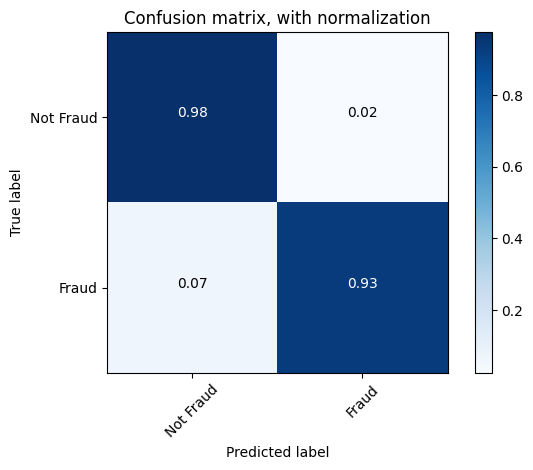

In [ ]:
plt.figure()
plot_confusion_matrix(cnf, classes=['Not Fraud','Fraud'], normalize = True,
                      title='Confusion matrix, with normalization')

Confusion matrix, without normalization
[[2891   73]
 [ 196 2639]]


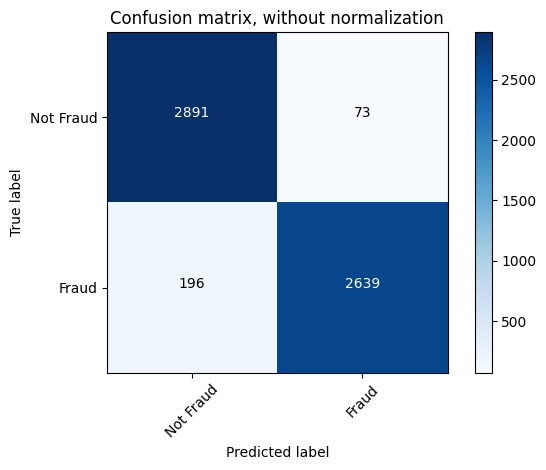

In [ ]:
plt.figure()
plot_confusion_matrix(cnf, classes=['Not Fraud','Fraud'], normalize = False,
                      title='Confusion matrix, without normalization')
plt.show()

In [ ]:
print(classification_report(y_test_re, y_pred.round()))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2964
           1       0.97      0.93      0.95      2835

    accuracy                           0.95      5799
   macro avg       0.95      0.95      0.95      5799
weighted avg       0.95      0.95      0.95      5799



In [ ]:
print(accuracy_score(y_test_re, y_pred.round()))
print(precision_score(y_test_re, y_pred.round()))
print(recall_score(y_test_re, y_pred.round()))
print(f1_score(y_test_re, y_pred.round()))

0.9536126918434212
0.9730825958702065
0.9308641975308642
0.9515053181900127


In [ ]:
accuracy = accuracy_score(y_test_re, y_pred.round())
precision = precision_score(y_test_re, y_pred.round())
recall = recall_score(y_test_re, y_pred.round())
f1 = f1_score(y_test_re, y_pred.round())

In [ ]:
print('Accuracy {:0.2f} %:'.format(accuracy * 100))
print('Precision {:0.2f} %:'.format(precision * 100))
print('Recall {:0.2f} %:'.format(recall * 100))
print('f1 score {:0.2f} %:'.format(f1 * 100))

Accuracy 95.36 %:
Precision 97.31 %:
Recall 93.09 %:
f1 score 95.15 %:
